# The Reuters Corpus

### In this problem, we found two differenct sentiment analysis: the VADER and the TextBlob analysis. We pre-processed the data with the stopwords and then we were able to feed all the text through both sentiment analysis methods. I created a column that shows the difference between the VADER and TB, and another column that did TB minus VADER. We then found the 5 authors that had the biggest difference between the two analysis methods and plotted them below. We then wanted to see whether there were any authors that had a negative sentiment on one of the analysis and a positive on the other. I found this out by creating a column that multiplied the VADER and TB sentiments together, since if they were both positive or negative then the product would be positive, while a negative result would mean the two sentiments didn't line up. I then analyzed the two authors with the biggest difference from this section, and pulled in some keywords. I realized that both authors seemed to be talking about politics in Colombia and China, respectively. We could infer from the keywords and the varying sentiment analysis that the articles that were written by these authors likely varied on a scale of negative or positive, since the news in these countries tends to vary from negative to positive. 

In [28]:
import nltk
import nltk
nltk.download()
import random
import os
import re
import numpy as np
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
from nltk.corpus import reuters, stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#download stopwords and import data from personal drive
nltk.download('stopwords')
#MAY NEED TO CHANGE BELOW LINK TO SUBMIT PROPERLY
data_dir = "C:\\Users\\krgod\\Documents\\Texas MSBA\\Summer Semester\\STA 380\\Part 2\\ReutersC50\\C50test"
nltk.data.path.append(os.path.abspath(data_dir))
nltk.download('stopwords', download_dir=data_dir)
nltk.download('reuters', download_dir=data_dir)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krgod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krgod\Documents\Texas MSBA\Summer
[nltk_data]     Semester\STA 380\Part 2\ReutersC50\C50test...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\krgod\Documents\Texas MSBA\Summer
[nltk_data]     Semester\STA 380\Part 2\ReutersC50\C50test...
[nltk_data]   Package reuters is already up-to-date!


True

In [29]:
#sentiment analysis
analyzer = SentimentIntensityAnalyzer()
author_sentiments = []

for author_dir in os.listdir(data_dir):
    author_path = os.path.join(data_dir, author_dir)
    if os.path.isdir(author_path):
        sentiments = []
        for file in os.listdir(author_path):
            if file.endswith(".txt"):
                file_path = os.path.join(author_path, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    text = f.read()

                    # Preprocess the text
                    words = re.findall(r'\b\w+\b', text.lower())
                    stop_words = set(stopwords.words('english'))
                    words = [word for word in words if word not in stop_words]
                    processed_text = " ".join(words)
                    
                    # Perform sentiment analysis using VADER
                    vader_sentiment = analyzer.polarity_scores(processed_text)['compound']
                    
                    # Perform sentiment analysis using TextBlob
                    blob_sentiment = TextBlob(processed_text).sentiment.polarity
                    
                    # Store the results
                    sentiments.append((vader_sentiment, blob_sentiment))
         # Aggregate sentiment for this author
        avg_vader_sentiment = sum(s[0] for s in sentiments) / len(sentiments) if sentiments else 0
        avg_blob_sentiment = sum(s[1] for s in sentiments) / len(sentiments) if sentiments else 0
        
        author_sentiments.append({
            'Author': author_dir,
            'Avg_VADER_Sentiment': avg_vader_sentiment,
            'Avg_TextBlob_Sentiment': avg_blob_sentiment
        })

df_sentiments = pd.DataFrame(author_sentiments)

# Display the DataFrame
df_sentiments[:5]

,Author,Avg_VADER_Sentiment,Avg_TextBlob_Sentiment
0,AaronPressman,0.568550,0.068444
1,AlanCrosby,0.659056,0.042353
2,AlexanderSmith,0.233894,0.065448
3,BenjaminKangLim,-0.511120,0.013615
4,BernardHickey,0.721658,0.055444


<Axes: title={'center': 'Difference between VADER and TB'}, xlabel='Author'>

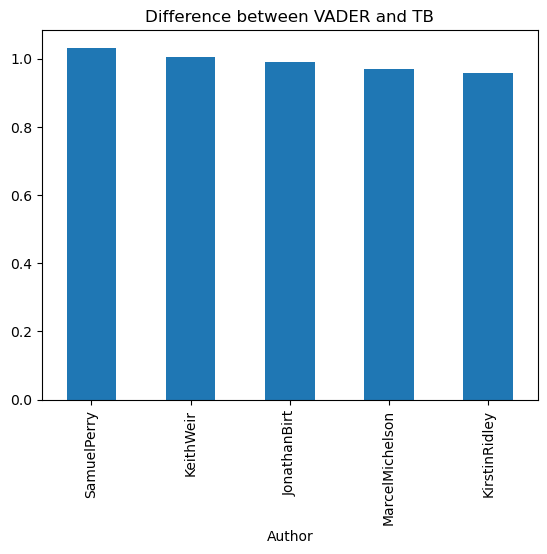

In [30]:
#find authors with biggest differences between two sentiment calculators
df_sentiments['Difference'] = df_sentiments['Avg_VADER_Sentiment'] + df_sentiments['Avg_TextBlob_Sentiment']
VADER_minus_TB = df_sentiments.sort_values(by = 'Difference',ascending = False) #returns 5 authors with biggest difference between VADER and TextBlob
VADER_minus_TB[:5].plot(kind = 'bar', x = 'Author', y = 'Difference', title = 'Difference between VADER and TB', legend = False)

<Axes: title={'center': 'Difference Between TB and VADER'}, xlabel='Author'>

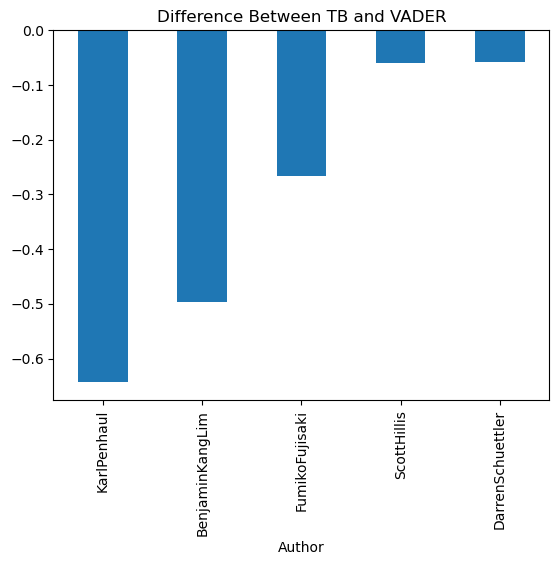

In [31]:
TB_minus_VADER = df_sentiments.sort_values(by = 'Difference',ascending = True) #returns 5 authors with biggest difference between TextBlob and VADER
TB_minus_VADER[:5].plot(kind = 'bar', x = 'Author', y = 'Difference', title = 'Difference Between TB and VADER', legend = False)

In [32]:
#find instances where two sentiment calculators are returning opposite sentiments by multiplying sentiments together
df_sentiments['Opposite'] = df_sentiments['Avg_VADER_Sentiment'] * df_sentiments['Avg_TextBlob_Sentiment']
opposite_df = df_sentiments[df_sentiments['Opposite'] <0]
opposite_df.sort_values(by = 'Difference',ascending = True)

#Karl Penhaul if the author with the biggest difference between a positive and negative rating among authors that had the two rating systems
#giving opposite results. 

,Author,Avg_VADER_Sentiment,Avg_TextBlob_Sentiment,Difference,Opposite
21,KarlPenhaul,-0.658348,0.014949,-0.643399,-0.009842
3,BenjaminKangLim,-0.511120,0.013615,-0.497505,-0.006959
11,FumikoFujisaki,-0.266928,0.000132,-0.266796,-0.000035
44,ScottHillis,-0.092346,0.032247,-0.060099,-0.002978
7,DarrenSchuettler,-0.106262,0.048814,-0.057448,-0.005187
34,MichaelConnor,-0.002626,0.074201,0.071575,-0.000195


In [33]:
#find keywords in Karl Penhaul's texts 
karlpenhaul = []
author_name = "KarlPenhaul"
#open all files authored by Karl Penhaul 
author_path = os.path.join(data_dir, author_name)
if os.path.isdir(author_path):
    for file in os.listdir(author_path):
        if file.endswith(".txt"):
            file_path = os.path.join(author_path, file)
            with open(file_path, 'r', encoding='utf-8') as f:
                karlpenhaul.append(f.read())

combined_text = " ".join(karlpenhaul)

stop_words = set(stopwords.words('english'))
words = re.findall(r'\b\w+\b', combined_text.lower())
filtered_words = [word for word in words if word not in stop_words]

word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)
common_words

[('said', 281),
 ('colombia', 162),
 ('government', 119),
 ('strike', 119),
 ('army', 97),
 ('workers', 85),
 ('would', 83),
 ('drug', 79),
 ('last', 76),
 ('000', 71),
 ('one', 62),
 ('farc', 61),
 ('national', 61),
 ('people', 60),
 ('political', 57),
 ('bogota', 56),
 ('samper', 55),
 ('guerrillas', 54),
 ('state', 54),
 ('coffee', 54)]

In [34]:
#repeat code for BenjaminKangLim
#find keywords in Karl Penhaul's texts 
bkl = [] #author's initials
author_name = "BenjaminKangLim"
#open all files authored by Karl Penhaul 
author_path = os.path.join(data_dir, author_name)
if os.path.isdir(author_path):
    for file in os.listdir(author_path):
        if file.endswith(".txt"):
            file_path = os.path.join(author_path, file)
            with open(file_path, 'r', encoding='utf-8') as f:
                bkl.append(f.read())

combined_text = " ".join(bkl)

stop_words = set(stopwords.words('english'))
words = re.findall(r'\b\w+\b', combined_text.lower())
filtered_words = [word for word in words if word not in stop_words]

word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)
common_words[:20]


[('said', 460),
 ('china', 330),
 ('chinese', 180),
 ('beijing', 154),
 ('would', 94),
 ('people', 88),
 ('year', 86),
 ('last', 86),
 ('police', 72),
 ('one', 72),
 ('foreign', 70),
 ('u', 70),
 ('party', 66),
 ('officials', 63),
 ('north', 63),
 ('percent', 62),
 ('years', 61),
 ('taiwan', 61),
 ('hong', 61),
 ('kong', 61)]

In [35]:
#both authors seem to be writing articles/related to the governments of Colombia and China respectively, judging by the keywords. 
#the articles seemed to be a mixed bag of positive and negative comments/articles which is throwing off the sentiment analysis. 